# Convolutions

Convolutions are a way to apply a filter to a matrix or image using a defined kernel. This filter can highlight certain attributes or features of the matrix or image. Convolutions are often used in Convolutional Neural Networks (CNN).

In this notebook we will go over how dilated convolutions work and different kernels that can be applied.

In [2]:
#example taken from https://www.geeksforgeeks.org/dilated-convolution/
import numpy as np
import tensorflow as tf
import sys
from  scipy.signal import convolve2d
 
np.random.seed(678)
tf.random.set_seed(6789)
sess = tf.compat.v1.Session()

### Set up our matrix and add 1's in the middle to create a difference in pixel value

In [3]:
# Initializing a 9x9 matrix of zeros.
mat_size = 9
matrix = np.zeros((mat_size,mat_size)).astype(np.float32)
 
# Assigning 1's in the middle of matrix
# to create a random input matrix
for x in range(4,7):
    for y in range(3,6):
        matrix[y,x] = 1
 

### Experimental Kernel

In [4]:
# Creating an experimental kernel for test
kernel = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]
]).astype(np.float32)

### Edge Detection Kernel

Edge detection kernels are used for cases when you want to detect edges in images/matrices. Edge kernels accomplish this by highlighting regions where there is a change in intensity and contrast. It makes the edges stand out while setting uniform areas to near-zero values.

In [5]:
kernel = np.array([
        [-1, -1, -1],
        [-1,  8, -1],
        [-1, -1, -1]
    ]).astype(np.float32)

### Blurring Kernel 

Smooths out an image/matrix by averageing pixel values. This reduces noise and detail. By averaging the values it creates a 'blurred' effect.


In [6]:
kernel = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
]).astype(np.float32)

### Sharpening Kernel 

Sharpens edges and details in the image/matrix. Increases contrast and intensity changes at edges and transitions between groups. Amplifies the difference between neighboring pixel values. 

In [7]:
kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
]).astype(np.float32)

In [8]:
# self-initializing a dilated kernel.
# ======[dilation factor = 3]======
dilated_kernel = np.array([
    [1,0,0,2,0,0,3],
    [0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0],
    [4,0,0,5,0,0,6],
    [0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0],
    [7,0,0,8,0,0,9]
])
 
print('\n')
print("Dilated kernel Shape : ",dilated_kernel.shape)
print(dilated_kernel)
 
print('\n')
print("DILATED CONVOLUTION RESULTS [Dilation Factor = 3]")
output = convolve2d(matrix,dilated_kernel,mode='valid')
print("Numpy Results Shape: ",output.shape)
print(output)



Dilated kernel Shape :  (7, 7)
[[1 0 0 2 0 0 3]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [4 0 0 5 0 0 6]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [7 0 0 8 0 0 9]]


DILATED CONVOLUTION RESULTS [Dilation Factor = 3]
Numpy Results Shape:  (3, 3)
[[4. 5. 5.]
 [4. 5. 5.]
 [4. 5. 5.]]


# Try it yourself!

- Use each of the different kernels to see how the resulting image varies. Plot the resulting matrix to help visualize what each kernel is doing. 
- What scenarios might each kernel be useful?

In [9]:
# Hint: Use matplotlib to visualize the results. Use cmap to make the image grayscale
# Initializing a 9x9 matrix of zeros.
mat_size = 9
matrix = np.zeros((mat_size,mat_size)).astype(np.float32)
 
# Assigning 1's in the middle of matrix
# to create a random input matrix
for x in range(4,7):
    for y in range(3,6):
        matrix[y,x] = 1
 
 

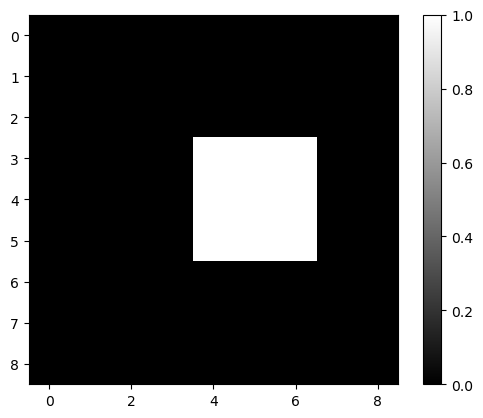

In [10]:
# Example of how to use matplotlib to visualize the original matrix
import matplotlib.pyplot as plt
plt.imshow(matrix, cmap='gray')
plt.colorbar()
plt.show()
